In [11]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.fft import rfft
from sklearn.preprocessing import StandardScaler

In [ ]:
BASE_DIR = "/Users/kumar/Desktop/Semester_3 /ML Projetcs/Mov_data"

def extract_fft_features_from_folder(base_dir):
    all_features = []

    csv_files = glob.glob(os.path.join(base_dir, "**", "*.csv"), recursive=True)
    print("Total CSV files found:", len(csv_files))

    for path in csv_files:
        df = pd.read_csv(path, header=None)
        df = df.apply(pd.to_numeric, errors="coerce").fillna(0)

        fft_vals = np.abs(rfft(df.values, axis=1))

        features = pd.DataFrame({
            "fft_mean": fft_vals.mean(axis=1), # average frequeny magnitude
            "fft_std": fft_vals.std(axis=1), #frequency spread
            "fft_max": fft_vals.max(axis=1), # strongest frequency component
            "fft_energy": (fft_vals ** 2).sum(axis=1), #overall signal strength
            "fft_peak_idx": np.argmax(fft_vals, axis=1), #dominant frequency index
        })

        all_features.append(features)

    return pd.concat(all_features, ignore_index=True)

Total CSV files found: 40
       fft_mean        fft_std       fft_max    fft_energy  fft_peak_idx  \
0  1.956030e+06  102905.164368  2.978329e+06  9.595057e+16             0   
1  1.956034e+06  103004.054505  2.950844e+06  9.595149e+16             0   
2  1.956033e+06  102984.967791  2.951921e+06  9.595130e+16             0   
3  1.956038e+06  103037.814891  2.991329e+06  9.595206e+16             0   
4  1.956040e+06  103149.999876  2.927670e+06  9.595287e+16             0   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


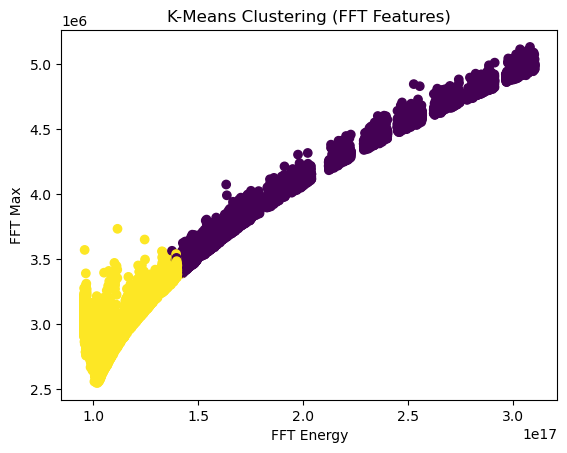

In [21]:
from sklearn.cluster import KMeans

X = extract_fft_features_from_folder(BASE_DIR)

X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
print(X["motion_label"].value_counts())

X["cluster"] = clusters
print(X.head())

plt.scatter(X["fft_energy"], X["fft_max"], c=clusters, cmap="viridis")
plt.xlabel("FFT Energy")
plt.ylabel("FFT Max")
plt.title("K-Means Clustering (FFT Features)")
plt.show()

Total CSV files found: 40
cluster
0    27792
1     2162
2       34
3       12
Name: count, dtype: int64


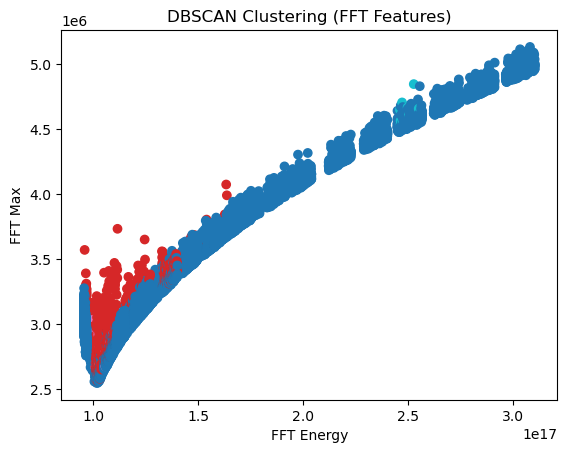

In [14]:
# DBSCAN (FFT BASED)

from sklearn.cluster import DBSCAN

X = extract_fft_features_from_folder(BASE_DIR)
X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=0.8, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

X["cluster"] = clusters
print(X["cluster"].value_counts())

plt.scatter(X["fft_energy"], X["fft_max"], c=clusters, cmap="tab10")
plt.xlabel("FFT Energy")
plt.ylabel("FFT Max")
plt.title("DBSCAN Clustering (FFT Features)")
plt.show()


Total CSV files found: 40


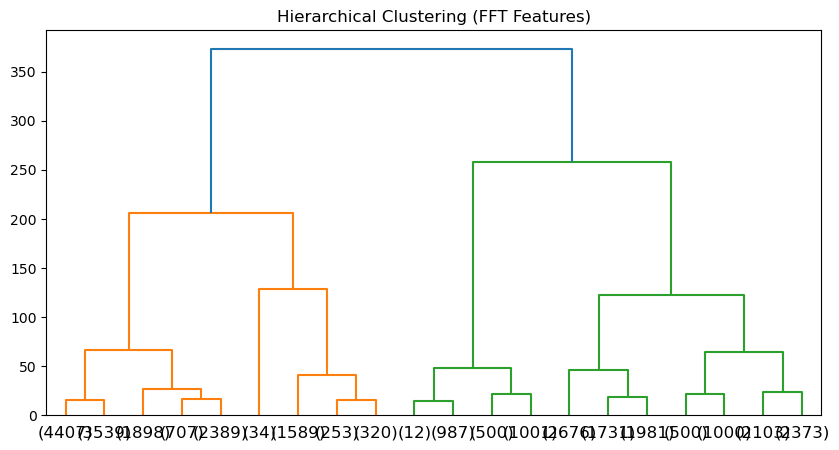

       fft_mean        fft_std       fft_max    fft_energy  fft_peak_idx  \
0  1.956030e+06  102905.164368  2.978329e+06  9.595057e+16             0   
1  1.956034e+06  103004.054505  2.950844e+06  9.595149e+16             0   
2  1.956033e+06  102984.967791  2.951921e+06  9.595130e+16             0   
3  1.956038e+06  103037.814891  2.991329e+06  9.595206e+16             0   
4  1.956040e+06  103149.999876  2.927670e+06  9.595287e+16             0   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [15]:
#  HIERARCHICAL CLUSTERING (FFT BASED)

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

X = extract_fft_features_from_folder(BASE_DIR)
X_scaled = StandardScaler().fit_transform(X)

Z = linkage(X_scaled, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="lastp", p=20)
plt.title("Hierarchical Clustering (FFT Features)")
plt.show()

clusters = fcluster(Z, t=2, criterion="maxclust")
X["cluster"] = clusters

print(X.head())
